In [4]:
import pandas as pd

# Read

In [5]:
df = pd.read_csv('./dataset/data-label.csv')
df.head()

copy_df = df.copy()

In [6]:
df = df.drop_duplicates()
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 876 entries, 0 to 891
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   full_text   876 non-null    object
 1   text_clean  876 non-null    object
 2   Label       876 non-null    object
dtypes: object(3)
memory usage: 27.4+ KB


# Tokenize

In [7]:
# Fungsi untuk tokenisasi manual
def tokenize(text):
    return text.split()  # Memisahkan kata berdasarkan spasi

In [8]:
df['token'] = df['text_clean'].apply(tokenize)
df.head()

,full_text,text_clean,Label,token
0,@PartaiSocmed Sumber = tiktok TKN Prabowo Gibr...,sumber tiktok tkn prabowo gibran,netral,"[sumber, tiktok, tkn, prabowo, gibran]"
1,Solidaritas positif Mantan Kepala Desa: Prabow...,solidaritas positif mantan kepala desa prabowo...,positif,"[solidaritas, positif, mantan, kepala, desa, p..."
2,Keputusan mantan Kepala Desa: Prabowo-Gibran a...,keputusan mantan kepala desa prabowogibran ada...,positif,"[keputusan, mantan, kepala, desa, prabowogibra..."
3,Ahmad dhani kampanye PRABOWO GIBRAN 🫰🫰🫰🫰🫰🫰🫰 ht...,ahmad dhani kampanye prabowo gibran,positif,"[ahmad, dhani, kampanye, prabowo, gibran]"
4,Pilihan optimis Mantan Kepala Desa: Prabowo-Gi...,pilihan optimis mantan kepala desa prabowogibr...,positif,"[pilihan, optimis, mantan, kepala, desa, prabo..."


# Stopwords

In [9]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize, sent_tokenize

nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\whisn\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\whisn\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\whisn\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [10]:
nltk_stopwords = stopwords.words('indonesian')
print(nltk_stopwords)
print(len(nltk_stopwords))

['ada', 'adalah', 'adanya', 'adapun', 'agak', 'agaknya', 'agar', 'akan', 'akankah', 'akhir', 'akhiri', 'akhirnya', 'aku', 'akulah', 'amat', 'amatlah', 'anda', 'andalah', 'antar', 'antara', 'antaranya', 'apa', 'apaan', 'apabila', 'apakah', 'apalagi', 'apatah', 'artinya', 'asal', 'asalkan', 'atas', 'atau', 'ataukah', 'ataupun', 'awal', 'awalnya', 'bagai', 'bagaikan', 'bagaimana', 'bagaimanakah', 'bagaimanapun', 'bagi', 'bagian', 'bahkan', 'bahwa', 'bahwasanya', 'baik', 'bakal', 'bakalan', 'balik', 'banyak', 'bapak', 'baru', 'bawah', 'beberapa', 'begini', 'beginian', 'beginikah', 'beginilah', 'begitu', 'begitukah', 'begitulah', 'begitupun', 'bekerja', 'belakang', 'belakangan', 'belum', 'belumlah', 'benar', 'benarkah', 'benarlah', 'berada', 'berakhir', 'berakhirlah', 'berakhirnya', 'berapa', 'berapakah', 'berapalah', 'berapapun', 'berarti', 'berawal', 'berbagai', 'berdatangan', 'beri', 'berikan', 'berikut', 'berikutnya', 'berjumlah', 'berkali-kali', 'berkata', 'berkehendak', 'berkeinginan'

In [11]:
from Sastrawi.StopWordRemover.StopWordRemoverFactory import  StopWordRemoverFactory
factory = StopWordRemoverFactory()
sastrawi_stopwords = factory.get_stop_words()

print(sastrawi_stopwords)
print(len(sastrawi_stopwords))

['yang', 'untuk', 'pada', 'ke', 'para', 'namun', 'menurut', 'antara', 'dia', 'dua', 'ia', 'seperti', 'jika', 'jika', 'sehingga', 'kembali', 'dan', 'tidak', 'ini', 'karena', 'kepada', 'oleh', 'saat', 'harus', 'sementara', 'setelah', 'belum', 'kami', 'sekitar', 'bagi', 'serta', 'di', 'dari', 'telah', 'sebagai', 'masih', 'hal', 'ketika', 'adalah', 'itu', 'dalam', 'bisa', 'bahwa', 'atau', 'hanya', 'kita', 'dengan', 'akan', 'juga', 'ada', 'mereka', 'sudah', 'saya', 'terhadap', 'secara', 'agar', 'lain', 'anda', 'begitu', 'mengapa', 'kenapa', 'yaitu', 'yakni', 'daripada', 'itulah', 'lagi', 'maka', 'tentang', 'demi', 'dimana', 'kemana', 'pula', 'sambil', 'sebelum', 'sesudah', 'supaya', 'guna', 'kah', 'pun', 'sampai', 'sedangkan', 'selagi', 'sementara', 'tetapi', 'apakah', 'kecuali', 'sebab', 'selain', 'seolah', 'seraya', 'seterusnya', 'tanpa', 'agak', 'boleh', 'dapat', 'dsb', 'dst', 'dll', 'dahulu', 'dulunya', 'anu', 'demikian', 'tapi', 'ingin', 'juga', 'nggak', 'mari', 'nanti', 'melainkan', '

In [12]:
def stopwords_text(tokens): 
    cleaned_tokens = []
    for token in tokens : 
        if token not in sastrawi_stopwords: 
            cleaned_tokens.append(token)
        
    return cleaned_tokens

In [13]:
df['stop'] = df['token'].apply(stopwords_text)
df.head()

,full_text,text_clean,Label,token,stop
0,@PartaiSocmed Sumber = tiktok TKN Prabowo Gibr...,sumber tiktok tkn prabowo gibran,netral,"[sumber, tiktok, tkn, prabowo, gibran]","[sumber, tiktok, tkn, prabowo, gibran]"
1,Solidaritas positif Mantan Kepala Desa: Prabow...,solidaritas positif mantan kepala desa prabowo...,positif,"[solidaritas, positif, mantan, kepala, desa, p...","[solidaritas, positif, mantan, kepala, desa, p..."
2,Keputusan mantan Kepala Desa: Prabowo-Gibran a...,keputusan mantan kepala desa prabowogibran ada...,positif,"[keputusan, mantan, kepala, desa, prabowogibra...","[keputusan, mantan, kepala, desa, prabowogibra..."
3,Ahmad dhani kampanye PRABOWO GIBRAN 🫰🫰🫰🫰🫰🫰🫰 ht...,ahmad dhani kampanye prabowo gibran,positif,"[ahmad, dhani, kampanye, prabowo, gibran]","[ahmad, dhani, kampanye, prabowo, gibran]"
4,Pilihan optimis Mantan Kepala Desa: Prabowo-Gi...,pilihan optimis mantan kepala desa prabowogibr...,positif,"[pilihan, optimis, mantan, kepala, desa, prabo...","[pilihan, optimis, mantan, kepala, desa, prabo..."


# Stemming

In [14]:
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

In [15]:
stem_factory = StemmerFactory()
stemmer = stem_factory.create_stemmer()

In [16]:
def stem_words(tokens):
  hasil = [stemmer.stem(token) for token in tokens]
  return hasil

In [17]:
df['stemmed'] = df['stop'].apply(stem_words)
df.head()

,full_text,text_clean,Label,token,stop,stemmed
0,@PartaiSocmed Sumber = tiktok TKN Prabowo Gibr...,sumber tiktok tkn prabowo gibran,netral,"[sumber, tiktok, tkn, prabowo, gibran]","[sumber, tiktok, tkn, prabowo, gibran]","[sumber, tiktok, tkn, prabowo, gibran]"
1,Solidaritas positif Mantan Kepala Desa: Prabow...,solidaritas positif mantan kepala desa prabowo...,positif,"[solidaritas, positif, mantan, kepala, desa, p...","[solidaritas, positif, mantan, kepala, desa, p...","[solidaritas, positif, mantan, kepala, desa, p..."
2,Keputusan mantan Kepala Desa: Prabowo-Gibran a...,keputusan mantan kepala desa prabowogibran ada...,positif,"[keputusan, mantan, kepala, desa, prabowogibra...","[keputusan, mantan, kepala, desa, prabowogibra...","[putus, mantan, kepala, desa, prabowogibran, j..."
3,Ahmad dhani kampanye PRABOWO GIBRAN 🫰🫰🫰🫰🫰🫰🫰 ht...,ahmad dhani kampanye prabowo gibran,positif,"[ahmad, dhani, kampanye, prabowo, gibran]","[ahmad, dhani, kampanye, prabowo, gibran]","[ahmad, dhani, kampanye, prabowo, gibran]"
4,Pilihan optimis Mantan Kepala Desa: Prabowo-Gi...,pilihan optimis mantan kepala desa prabowogibr...,positif,"[pilihan, optimis, mantan, kepala, desa, prabo...","[pilihan, optimis, mantan, kepala, desa, prabo...","[pilih, optimis, mantan, kepala, desa, prabowo..."


In [18]:
df = df[['full_text', 'text_clean', 'token', 'stop', 'stemmed', 'Label']]
df.head()

,full_text,text_clean,token,stop,stemmed,Label
0,@PartaiSocmed Sumber = tiktok TKN Prabowo Gibr...,sumber tiktok tkn prabowo gibran,"[sumber, tiktok, tkn, prabowo, gibran]","[sumber, tiktok, tkn, prabowo, gibran]","[sumber, tiktok, tkn, prabowo, gibran]",netral
1,Solidaritas positif Mantan Kepala Desa: Prabow...,solidaritas positif mantan kepala desa prabowo...,"[solidaritas, positif, mantan, kepala, desa, p...","[solidaritas, positif, mantan, kepala, desa, p...","[solidaritas, positif, mantan, kepala, desa, p...",positif
2,Keputusan mantan Kepala Desa: Prabowo-Gibran a...,keputusan mantan kepala desa prabowogibran ada...,"[keputusan, mantan, kepala, desa, prabowogibra...","[keputusan, mantan, kepala, desa, prabowogibra...","[putus, mantan, kepala, desa, prabowogibran, j...",positif
3,Ahmad dhani kampanye PRABOWO GIBRAN 🫰🫰🫰🫰🫰🫰🫰 ht...,ahmad dhani kampanye prabowo gibran,"[ahmad, dhani, kampanye, prabowo, gibran]","[ahmad, dhani, kampanye, prabowo, gibran]","[ahmad, dhani, kampanye, prabowo, gibran]",positif
4,Pilihan optimis Mantan Kepala Desa: Prabowo-Gi...,pilihan optimis mantan kepala desa prabowogibr...,"[pilihan, optimis, mantan, kepala, desa, prabo...","[pilihan, optimis, mantan, kepala, desa, prabo...","[pilih, optimis, mantan, kepala, desa, prabowo...",positif


# EDA

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns 


In [20]:
df['Label'].value_counts()

Label
negatif     499
positif     373
negatif       3
netral        1
Name: count, dtype: int64

In [21]:
df['Label'] = df['Label'].str.strip().str.lower()

# Mengubah 'netral' menjadi 'negatif'
df['Label'] = df['Label'].replace('netral', 'negatif')

# Menyeimbangkan Label
df.loc[df['Label'] == 'netral', 'Label'] = 'negatif'

# Melihat distribusi Label setelah perubahan
print(df['Label'].value_counts())

Label
negatif    503
positif    373
Name: count, dtype: int64


C:\Users\whisn\AppData\Local\Temp\ipykernel_7288\2291650570.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=counts.index, y=counts.values, palette='viridis')


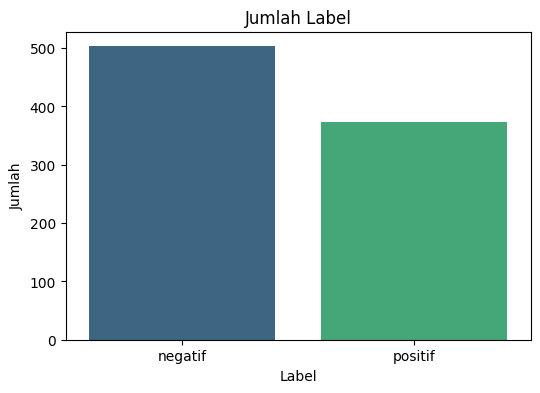

In [22]:
# Menghitung jumlah masing-masing nilai pada kolom 'Label'
counts = df['Label'].value_counts()

# Memplot hasil dengan Seaborn
plt.figure(figsize=(6, 4))  # Mengatur ukuran plot
sns.barplot(x=counts.index, y=counts.values, palette='viridis')

# Memberi judul dan label pada sumbu
plt.title('Jumlah Label')
plt.xlabel('Label')
plt.ylabel('Jumlah')

# Menampilkan plot
plt.show()

In [23]:
# Menggabungkan semua list menjadi satu list tunggal
merged_stemming = [word for sublist in df['stemmed'] for word in sublist]

In [24]:
# Menghitung frekuensi kemunculan setiap kata dan kolom 'Label'
word_freq = {}
for word, label in zip(merged_stemming, df['Label']):
    if word in word_freq:
        if label == 'positif':
            word_freq[word][0] += 1
        else:
            word_freq[word][1] += 1
    else:
        if label == 'positif':
            word_freq[word] = [1, 0]
        else:
            word_freq[word] = [0, 1]

# Membuat DataFrame dari hasil perhitungan frekuensi kata dan kolom 'Label'
df_word_freq = pd.DataFrame(word_freq.items(), columns=['Kata', 'Jumlah'])
df_word_freq[['Jumlah_Positif', 'Jumlah_Negatif']] = pd.DataFrame(df_word_freq['Jumlah'].tolist(), index=df_word_freq.index)
df_word_freq.drop('Jumlah', axis=1, inplace=True)


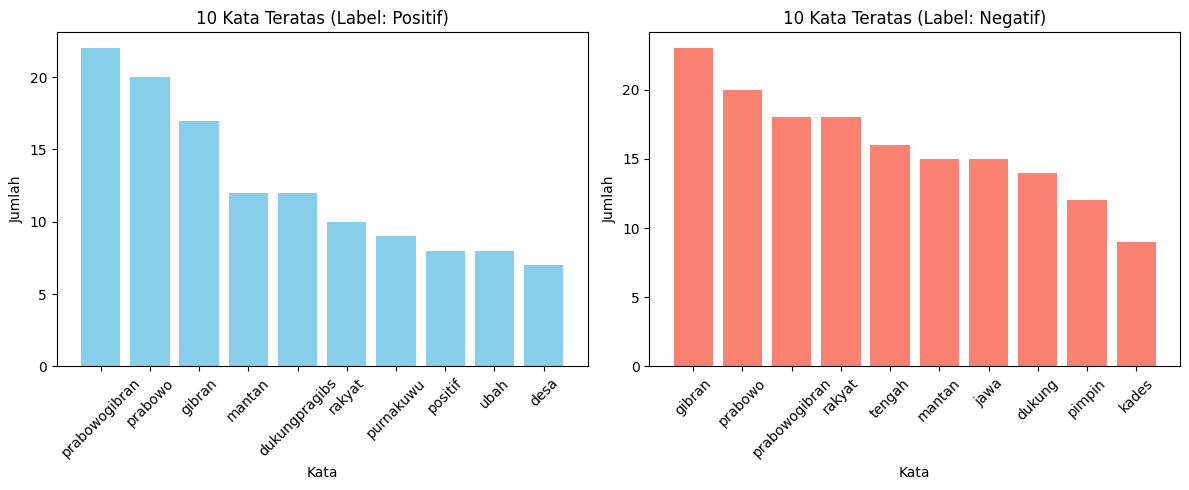

In [25]:
# Mengambil 10 kata teratas untuk masing-masing label
top_positif = df_word_freq.nlargest(10, 'Jumlah_Positif')
top_negatif = df_word_freq.nlargest(10, 'Jumlah_Negatif')

# Plot bar chart untuk 10 kata teratas masing-masing label
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.bar(top_positif['Kata'], top_positif['Jumlah_Positif'], color='skyblue')
plt.title('10 Kata Teratas (Label: Positif)')
plt.xticks(rotation=45)
plt.xlabel('Kata')
plt.ylabel('Jumlah')
plt.tight_layout()

plt.subplot(1, 2, 2)
plt.bar(top_negatif['Kata'], top_negatif['Jumlah_Negatif'], color='salmon')
plt.title('10 Kata Teratas (Label: Negatif)')
plt.xticks(rotation=45)
plt.xlabel('Kata')
plt.ylabel('Jumlah')
plt.tight_layout()

plt.show()

In [26]:
df.head()

,full_text,text_clean,token,stop,stemmed,Label
0,@PartaiSocmed Sumber = tiktok TKN Prabowo Gibr...,sumber tiktok tkn prabowo gibran,"[sumber, tiktok, tkn, prabowo, gibran]","[sumber, tiktok, tkn, prabowo, gibran]","[sumber, tiktok, tkn, prabowo, gibran]",negatif
1,Solidaritas positif Mantan Kepala Desa: Prabow...,solidaritas positif mantan kepala desa prabowo...,"[solidaritas, positif, mantan, kepala, desa, p...","[solidaritas, positif, mantan, kepala, desa, p...","[solidaritas, positif, mantan, kepala, desa, p...",positif
2,Keputusan mantan Kepala Desa: Prabowo-Gibran a...,keputusan mantan kepala desa prabowogibran ada...,"[keputusan, mantan, kepala, desa, prabowogibra...","[keputusan, mantan, kepala, desa, prabowogibra...","[putus, mantan, kepala, desa, prabowogibran, j...",positif
3,Ahmad dhani kampanye PRABOWO GIBRAN 🫰🫰🫰🫰🫰🫰🫰 ht...,ahmad dhani kampanye prabowo gibran,"[ahmad, dhani, kampanye, prabowo, gibran]","[ahmad, dhani, kampanye, prabowo, gibran]","[ahmad, dhani, kampanye, prabowo, gibran]",positif
4,Pilihan optimis Mantan Kepala Desa: Prabowo-Gi...,pilihan optimis mantan kepala desa prabowogibr...,"[pilihan, optimis, mantan, kepala, desa, prabo...","[pilihan, optimis, mantan, kepala, desa, prabo...","[pilih, optimis, mantan, kepala, desa, prabowo...",positif


# Feature Extraction

In [27]:
# Fungsi untuk tokenisasi manual
def untokenize(texts):
    text = ""
    for i in texts:
        text += f"{i}"
        text += " "
        
    return text.rstrip()

untokenize(['TES', 'HALO'])

'TES HALO'

In [28]:
df['untokenize_clean'] = df['stemmed'].apply(untokenize)
df = df[['full_text', 'text_clean', 'token', 'stop', 'stemmed','untokenize_clean', 'Label']]
df.head()

,full_text,text_clean,token,stop,stemmed,untokenize_clean,Label
0,@PartaiSocmed Sumber = tiktok TKN Prabowo Gibr...,sumber tiktok tkn prabowo gibran,"[sumber, tiktok, tkn, prabowo, gibran]","[sumber, tiktok, tkn, prabowo, gibran]","[sumber, tiktok, tkn, prabowo, gibran]",sumber tiktok tkn prabowo gibran,negatif
1,Solidaritas positif Mantan Kepala Desa: Prabow...,solidaritas positif mantan kepala desa prabowo...,"[solidaritas, positif, mantan, kepala, desa, p...","[solidaritas, positif, mantan, kepala, desa, p...","[solidaritas, positif, mantan, kepala, desa, p...",solidaritas positif mantan kepala desa prabowo...,positif
2,Keputusan mantan Kepala Desa: Prabowo-Gibran a...,keputusan mantan kepala desa prabowogibran ada...,"[keputusan, mantan, kepala, desa, prabowogibra...","[keputusan, mantan, kepala, desa, prabowogibra...","[putus, mantan, kepala, desa, prabowogibran, j...",putus mantan kepala desa prabowogibran jalan u...,positif
3,Ahmad dhani kampanye PRABOWO GIBRAN 🫰🫰🫰🫰🫰🫰🫰 ht...,ahmad dhani kampanye prabowo gibran,"[ahmad, dhani, kampanye, prabowo, gibran]","[ahmad, dhani, kampanye, prabowo, gibran]","[ahmad, dhani, kampanye, prabowo, gibran]",ahmad dhani kampanye prabowo gibran,positif
4,Pilihan optimis Mantan Kepala Desa: Prabowo-Gi...,pilihan optimis mantan kepala desa prabowogibr...,"[pilihan, optimis, mantan, kepala, desa, prabo...","[pilihan, optimis, mantan, kepala, desa, prabo...","[pilih, optimis, mantan, kepala, desa, prabowo...",pilih optimis mantan kepala desa prabowogibran...,positif


In [29]:
from sklearn.model_selection import train_test_split

In [30]:
df_train, df_test = train_test_split(df, test_size=0.3, random_state=42)
print("TRAIN size:", len(df_train))
print("TEST size:", len(df_test))

TRAIN size: 613
TEST size: 263


In [31]:
df_train.head()

,full_text,text_clean,token,stop,stemmed,untokenize_clean,Label
836,Prabowo-Gibran pilihan yang diakui oleh ratus...,prabowogibran pilihan yang diakui oleh ratusan...,"[prabowogibran, pilihan, yang, diakui, oleh, r...","[prabowogibran, pilihan, diakui, ratusan, mant...","[prabowogibran, pilih, aku, ratus, mantan, kad...",prabowogibran pilih aku ratus mantan kades lur...,positif
181,Dari Jawa Timur untuk Ganjar-Mahfud: Ngomong d...,dari jawa timur untuk ganjarmahfud ngomong doa...,"[dari, jawa, timur, untuk, ganjarmahfud, ngomo...","[jawa, timur, ganjarmahfud, ngomong, doang, ga...","[jawa, timur, ganjarmahfud, ngomong, doang, ga...",jawa timur ganjarmahfud ngomong doang gampang ...,negatif
849,Bersama Prabowo-Gibran mantan Kepala Desa Cir...,bersama prabowogibran mantan kepala desa cireb...,"[bersama, prabowogibran, mantan, kepala, desa,...","[bersama, prabowogibran, mantan, kepala, desa,...","[sama, prabowogibran, mantan, kepala, desa, ci...",sama prabowogibran mantan kepala desa cirebon ...,positif
69,Perubahan yang diharapkan oleh mantan kepala d...,perubahan yang diharapkan oleh mantan kepala d...,"[perubahan, yang, diharapkan, oleh, mantan, ke...","[perubahan, diharapkan, mantan, kepala, desa, ...","[ubah, harap, mantan, kepala, desa, kotakabupa...",ubah harap mantan kepala desa kotakabupaten ci...,positif
131,Suara persetujuan dari pemimpin daerah: Prabow...,suara persetujuan dari pemimpin daerah prabowo...,"[suara, persetujuan, dari, pemimpin, daerah, p...","[suara, persetujuan, pemimpin, daerah, prabowo...","[suara, tuju, pimpin, daerah, prabowogibran, j...",suara tuju pimpin daerah prabowogibran jamin a...,positif


In [32]:
df_train['Label'].value_counts()

Label
negatif    348
positif    265
Name: count, dtype: int64

In [33]:
df_test['Label'].value_counts()

Label
negatif    155
positif    108
Name: count, dtype: int64

In [181]:
documents = [_text.split() for _text in df_train.untokenize_clean] 
documents[:2]

[['prabowogibran',
  'pilih',
  'aku',
  'ratus',
  'mantan',
  'kades',
  'lurah',
  'cirebon',
  'purnakuwu',
  'dukungpragibs'],
 ['jawa',
  'timur',
  'ganjarmahfud',
  'ngomong',
  'doang',
  'gampang',
  'bang',
  'gibran',
  'mending',
  'dukung',
  'kerja',
  'nyata',
  'bukan',
  'debat',
  'kotak',
  'amal',
  'doang']]

In [35]:
print(len(documents))

613


In [37]:
# Word2vec
import gensim

In [38]:
# WORD2VEC 
W2V_SIZE = 300
W2V_WINDOW = 7
W2V_EPOCH = 32
W2V_MIN_COUNT = 10

In [39]:
# Inisialisasi model Word2Vec dengan parameter:
# - vector_size: Menentukan jumlah dimensi vektor untuk merepresentasikan kata-kata dalam model Word2Vec.
# - window: Parameter yang menentukan jendela konteks kata dalam teks yang akan dilihat oleh model saat melatih vektor kata.
# - min_count: Menentukan jumlah minimum kemunculan kata yang diperlukan agar kata tersebut diikutsertakan dalam pembangunan vektor kata.
# - workers: Menentukan jumlah thread atau pekerja yang akan digunakan saat melatih model.

w2v_model = gensim.models.Word2Vec(vector_size=W2V_SIZE, 
                                   window=W2V_WINDOW, 
                                   min_count=W2V_MIN_COUNT, 
                                   workers=8
                                   )

In [40]:
w2v_model.build_vocab(documents)

In [41]:
words = w2v_model.wv.index_to_key  # Mendapatkan daftar kata-kata dari model Word2Vec
vocab_size = len(words)  # Menghitung ukuran vocabulary
print("Vocab size:", vocab_size)

Vocab size: 162


In [42]:
print(words)

['prabowo', 'dukung', 'gibran', 'prabowogibran', 'ganjar', 'pimpin', 'mantan', 'dukungpragibs', 'purnakuwu', 'blunder', 'kades', 'cirebon', 'warga', 'lebih', 'jabar', 'ubah', 'buat', 'yg', 'rakyat', 'pilih', 'positif', 'bukan', 'sering', 'ham', 'sama', 'jadi', 'bikin', 'satu', 'estate', 'food', 'pak', 'percaya', 'desa', 'punya', 'gemoy', 'beda', 'debat', 'culik', 'capres', 'jelas', 'laku', 'yakin', 'ratus', 'anies', 'baik', 'masyarakat', 'suara', 'bawa', 'nyata', 'raya', 'kasus', 'jawa', 'langgar', 'indonesia', 'terlalu', 'ga', 'bukti', 'paslon', 'banyak', 'mau', 'presiden', 'mahfud', 'kerja', 'terus', 'gak', 'lurah', 'asam', 'orang', 'tengah', 'jokowi', 'fokus', 'jaga', 'suka', 'tegas', 'tunjuk', 'calon', 'apa', 'kepala', 'kampanye', 'beri', 'aman', 'solusi', 'lihat', 'salah', 'visi', 'kayak', 'masa', 'no', 'kalau', 'mampu', 'tahu', 'diri', 'malah', 'selalu', 'butuh', 'paham', 'kuat', 'masalah', 'tuju', 'bicara', 'banget', 'andal', 'maju', 'milik', 'integritas', 'cari', 'sih', 'hasil'

In [43]:
w2v_model.train(documents, total_examples=len(documents), epochs=W2V_EPOCH)

(85186, 269312)

In [44]:
similar_words = w2v_model.wv.most_similar('prabowo')
similar_words

[('ham', 0.9947797060012817),
 ('langgar', 0.9917489886283875),
 ('yg', 0.9911539554595947),
 ('mau', 0.9906649589538574),
 ('culik', 0.9904769062995911),
 ('gemoy', 0.9888848662376404),
 ('orang', 0.9860305190086365),
 ('malah', 0.9842596054077148),
 ('tanya', 0.9838572144508362),
 ('pernah', 0.9836741089820862)]

In [45]:
df_train.head()

,full_text,text_clean,token,stop,stemmed,untokenize_clean,Label
836,Prabowo-Gibran pilihan yang diakui oleh ratus...,prabowogibran pilihan yang diakui oleh ratusan...,"[prabowogibran, pilihan, yang, diakui, oleh, r...","[prabowogibran, pilihan, diakui, ratusan, mant...","[prabowogibran, pilih, aku, ratus, mantan, kad...",prabowogibran pilih aku ratus mantan kades lur...,positif
181,Dari Jawa Timur untuk Ganjar-Mahfud: Ngomong d...,dari jawa timur untuk ganjarmahfud ngomong doa...,"[dari, jawa, timur, untuk, ganjarmahfud, ngomo...","[jawa, timur, ganjarmahfud, ngomong, doang, ga...","[jawa, timur, ganjarmahfud, ngomong, doang, ga...",jawa timur ganjarmahfud ngomong doang gampang ...,negatif
849,Bersama Prabowo-Gibran mantan Kepala Desa Cir...,bersama prabowogibran mantan kepala desa cireb...,"[bersama, prabowogibran, mantan, kepala, desa,...","[bersama, prabowogibran, mantan, kepala, desa,...","[sama, prabowogibran, mantan, kepala, desa, ci...",sama prabowogibran mantan kepala desa cirebon ...,positif
69,Perubahan yang diharapkan oleh mantan kepala d...,perubahan yang diharapkan oleh mantan kepala d...,"[perubahan, yang, diharapkan, oleh, mantan, ke...","[perubahan, diharapkan, mantan, kepala, desa, ...","[ubah, harap, mantan, kepala, desa, kotakabupa...",ubah harap mantan kepala desa kotakabupaten ci...,positif
131,Suara persetujuan dari pemimpin daerah: Prabow...,suara persetujuan dari pemimpin daerah prabowo...,"[suara, persetujuan, dari, pemimpin, daerah, p...","[suara, persetujuan, pemimpin, daerah, prabowo...","[suara, tuju, pimpin, daerah, prabowogibran, j...",suara tuju pimpin daerah prabowogibran jamin a...,positif


In [179]:
df_train['stemmed'][:5]

836    [prabowogibran, pilih, aku, ratus, mantan, kad...
181    [jawa, timur, ganjarmahfud, ngomong, doang, ga...
849    [sama, prabowogibran, mantan, kepala, desa, ci...
69     [ubah, harap, mantan, kepala, desa, kotakabupa...
131    [suara, tuju, pimpin, daerah, prabowogibran, j...
Name: stemmed, dtype: object

In [47]:
import numpy as np


In [63]:
%%time
tokenizer = Tokenizer()
tokenizer.fit_on_texts(df_train.untokenize_clean)

vocab_size = len(tokenizer.word_index) + 1
print("Total words", vocab_size)

Total words 1721
CPU times: total: 0 ns
Wall time: 23.7 ms


In [111]:
%%time
x_train = pad_sequences(tokenizer.texts_to_sequences(df_train.untokenize_clean), maxlen=SEQUENCE_LENGTH)
x_test = pad_sequences(tokenizer.texts_to_sequences(df_test.untokenize_clean), maxlen=SEQUENCE_LENGTH)

CPU times: total: 62.5 ms
Wall time: 48.4 ms


In [177]:
x_train[:2]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   4,
         20, 109,  43,   7,  11,  63,  12,   8,   9],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   

In [178]:
x_test[:2]

array([[   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,   13,   16,   41,    5,
          14,   84,    6,  134,  119,  194,  136,    2,   56,   59,   42,
          10],
       [   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    

# Encoder

In [112]:
labels = df_train.Label.unique().tolist()
# labels.append("neutral")
labels

['positif', 'negatif']

In [113]:
def manual_label_encoder(labels):
    unique_labels = list(set(labels))  # Mendapatkan label unik
    label_index = {label: index for index, label in enumerate(unique_labels)}  # Membuat kamus untuk mapping label ke bilangan bulat
    encoded_labels = [label_index[label] for label in labels]  # Encoding label menjadi bilangan bulat
    return encoded_labels, label_index

def reshape_labels(encoded_labels):
    reshaped_labels = [[label] for label in encoded_labels]  # Reshape array hasil encoding ke bentuk (jumlah_data, 1)
    return reshaped_labels

In [114]:
# Data target dari dataframe
target_train = df_train['Label'].tolist()
target_test = df_test['Label'].tolist()

# Encoding label secara manual
y_train_encoded, label_index = manual_label_encoder(target_train)
y_test_encoded = [label_index[label] for label in target_test]  # Menggunakan mapping yang sama untuk data test

# Reshape array hasil encoding
y_train = reshape_labels(y_train_encoded)
y_test = reshape_labels(y_test_encoded)

# Menampilkan bentuk array hasil encoding
print("y_train", len(y_train))
print("y_test", len(y_test))


y_train 613
y_test 263


In [115]:
np.unique(y_train)

array([0, 1])

# Embedding Layer

In [116]:
embedding_matrix = np.zeros((vocab_size, W2V_SIZE))
for word, i in tokenizer.word_index.items():
  if word in w2v_model.wv:
    embedding_matrix[i] = w2v_model.wv[word]
print(embedding_matrix.shape)

(1721, 300)


In [117]:
embedding_layer = Embedding(vocab_size, W2V_SIZE, weights=[embedding_matrix], input_length=SEQUENCE_LENGTH, trainable=False)

# Build Model

In [118]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense, Dropout, Embedding, Flatten, Conv1D, MaxPooling1D, LSTM
from tensorflow.keras import utils
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping

In [119]:
model = Sequential()
model.add(embedding_layer)
model.add(Dropout(0.5))
model.add(LSTM(100, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(1, activation='sigmoid'))

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 100, 300)          516300    
                                                                 
 dropout_1 (Dropout)         (None, 100, 300)          0         
                                                                 
 lstm_1 (LSTM)               (None, 100)               160400    
                                                                 
 dense_1 (Dense)             (None, 1)                 101       
                                                                 
Total params: 676,801
Trainable params: 160,501
Non-trainable params: 516,300
_________________________________________________________________


In [120]:
model.compile(loss='binary_crossentropy',
              optimizer="adam",
              metrics=['accuracy'])

In [121]:
callbacks = [ ReduceLROnPlateau(monitor='val_loss', patience=5, cooldown=0),
              EarlyStopping(monitor='val_acc', min_delta=1e-4, patience=5)]

# Train

In [122]:
# KERAS
SEQUENCE_LENGTH = 100
EPOCHS = 8
BATCH_SIZE = 1024

In [123]:
import tensorflow as tf

# Ubah x_train dan y_train menjadi tensor
x_train_tensor = tf.convert_to_tensor(x_train)
y_train_tensor = tf.convert_to_tensor(y_train)
x_test_tensor = tf.convert_to_tensor(x_test)
y_test_tensor = tf.convert_to_tensor(y_test)

In [124]:
x_train_tensor

<tf.Tensor: shape=(613, 100), dtype=int32, numpy=
array([[   0,    0,    0, ...,   12,    8,    9],
       [   0,    0,    0, ...,  818,  819,  395],
       [   0,    0,    0, ...,   50,   15,   22],
       ...,
       [   0,    0,    0, ...,   52,    8,    9],
       [   0,    0,    0, ...,   24,   93,  207],
       [   0,    0,    0, ...,   79, 1720,  218]])>

In [125]:
%%time
history = model.fit(x_train_tensor, y_train_tensor,
                    batch_size=BATCH_SIZE,
                    epochs=EPOCHS,
                    validation_split=0.1,
                    verbose=1,
                    callbacks=callbacks)

Epoch 1/8
1/1 [==============================] - 8s 8s/step - loss: 0.6759 - accuracy: 0.6189 - val_loss: 0.6061 - val_accuracy: 0.8710 - lr: 0.0010
Epoch 2/8
1/1 [==============================] - 3s 3s/step - loss: 0.6136 - accuracy: 0.8457 - val_loss: 0.5482 - val_accuracy: 0.8710 - lr: 0.0010
Epoch 3/8
1/1 [==============================] - 3s 3s/step - loss: 0.5576 - accuracy: 0.8639 - val_loss: 0.4960 - val_accuracy: 0.8710 - lr: 0.0010
Epoch 4/8
1/1 [==============================] - 3s 3s/step - loss: 0.5070 - accuracy: 0.8584 - val_loss: 0.4482 - val_accuracy: 0.8710 - lr: 0.0010
Epoch 5/8
1/1 [==============================] - 3s 3s/step - loss: 0.4614 - accuracy: 0.8603 - val_loss: 0.4047 - val_accuracy: 0.8710 - lr: 0.0010
Epoch 6/8
1/1 [==============================] - 3s 3s/step - loss: 0.4211 - accuracy: 0.8548 - val_loss: 0.3664 - val_accuracy: 0.8710 - lr: 0.0010
Epoch 7/8
1/1 [==============================] - 3s 3s/step - loss: 0.3848 - accuracy: 0.8512 - val_loss: 

# Evaluate

In [126]:
%%time
score = model.evaluate(x_test_tensor, y_test_tensor, batch_size=BATCH_SIZE)
print()
print("ACCURACY:",score[1])
print("LOSS:",score[0])

1/1 [==============================] - 0s 245ms/step - loss: 0.3597 - accuracy: 0.8441

ACCURACY: 0.8441064357757568
LOSS: 0.3597324788570404
CPU times: total: 141 ms
Wall time: 326 ms


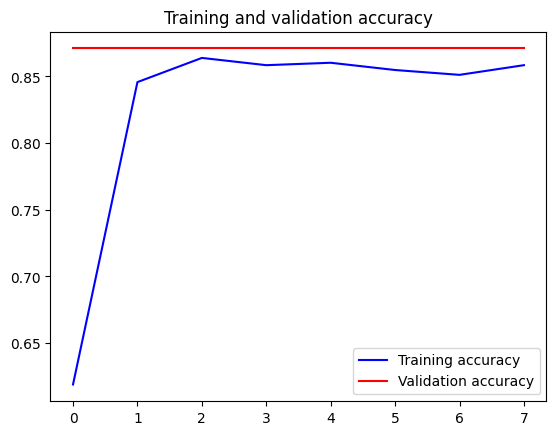

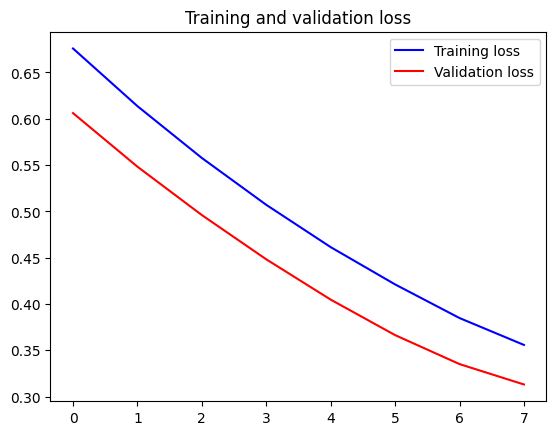

In [127]:
acc = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
 
epochs = range(len(acc))
 
plt.plot(epochs, acc, 'b', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'r', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
 
plt.figure()
 
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
 
plt.show()

# Predict

In [102]:
import time

In [159]:
# SENTIMENT
POSITIVE = "positif"
NEGATIVE = "negatif"
SENTIMENT_THRESHOLDS = (0.4, 0.6)

In [160]:
def decode_sentiment(score, include_neutral=True):
    if include_neutral:        
        label = ""
        if score <= 0.4:
            label = NEGATIVE
        else:
            label = POSITIVE
        return label
    else:
        return NEGATIVE if score <= 0.4 else POSITIVE

In [161]:
def predict(text, include_neutral=True):
    start_at = time.time()
    # Tokenize text
    x_test = pad_sequences(tokenizer.texts_to_sequences([text]), maxlen=SEQUENCE_LENGTH)
    # Predict
    score = model.predict([x_test])[0]
    # Decode sentiment
    label = decode_sentiment(score, include_neutral=include_neutral)

    return {"label": label, "score": float(score),
       "elapsed_time": time.time()-start_at}  

In [162]:
predict("Prabowo Blunder")

1/1 [==============================] - 0s 51ms/step


C:\Users\whisn\AppData\Local\Temp\ipykernel_7288\1332943948.py:10: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return {"label": label, "score": float(score),


{'label': 'negatif',
 'score': 0.22462134063243866,
 'elapsed_time': 0.11753726005554199}

In [163]:
predict("Dukung Prabowo")

1/1 [==============================] - 0s 46ms/step


C:\Users\whisn\AppData\Local\Temp\ipykernel_7288\1332943948.py:10: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return {"label": label, "score": float(score),


{'label': 'positif',
 'score': 0.4449637830257416,
 'elapsed_time': 0.11821365356445312}

In [164]:
predict("Dukung Pragibs")

1/1 [==============================] - 0s 51ms/step


C:\Users\whisn\AppData\Local\Temp\ipykernel_7288\1332943948.py:10: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return {"label": label, "score": float(score),


{'label': 'positif',
 'score': 0.5893702507019043,
 'elapsed_time': 0.11399602890014648}

In [165]:
predict("Prabowo tidak seperti Ganjar")

1/1 [==============================] - 0s 55ms/step


C:\Users\whisn\AppData\Local\Temp\ipykernel_7288\1332943948.py:10: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return {"label": label, "score": float(score),


{'label': 'negatif',
 'score': 0.23513580858707428,
 'elapsed_time': 0.1333448886871338}

# Confusion Matrix

In [166]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import itertools

In [167]:
%%time
y_pred_1d = []
y_test_1d = list(df_test.Label)
scores = model.predict(x_test, verbose=1, batch_size=8000)
y_pred_1d = [decode_sentiment(score, include_neutral=False) for score in scores]

1/1 [==============================] - 0s 307ms/step
CPU times: total: 266 ms
Wall time: 368 ms


In [168]:
def plot_confusion_matrix(cm, classes,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """

    cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title, fontsize=30)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=90, fontsize=22)
    plt.yticks(tick_marks, classes, fontsize=22)

    fmt = '.2f'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label', fontsize=25)
    plt.xlabel('Predicted label', fontsize=25)

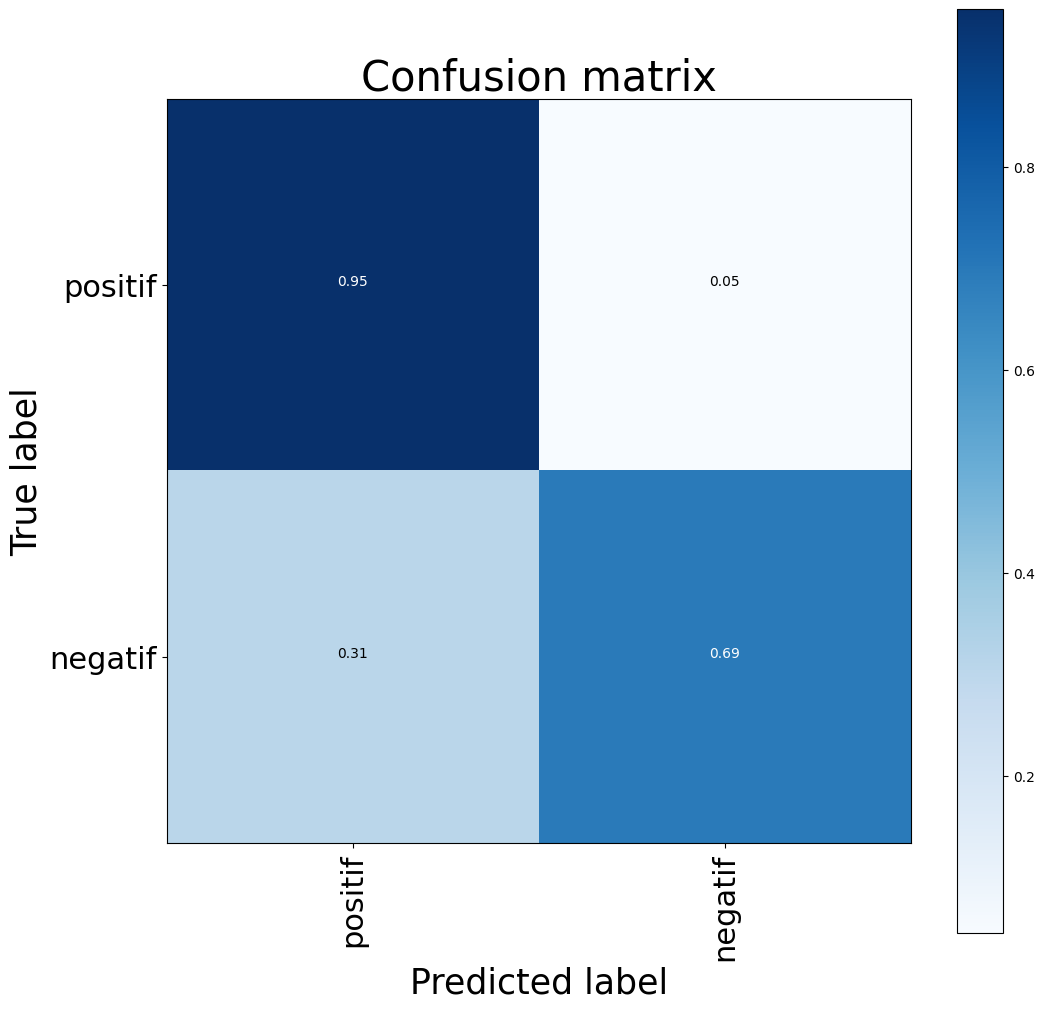

CPU times: total: 93.8 ms
Wall time: 453 ms


In [169]:
%%time

cnf_matrix = confusion_matrix(y_test_1d, y_pred_1d)
plt.figure(figsize=(12,12))
plot_confusion_matrix(cnf_matrix, classes=df_train.Label.unique(), title="Confusion matrix")
plt.show()

In [158]:
y_test_1d[:5]

['negatif', 'negatif', 'positif', 'negatif', 'positif']

In [156]:
y_pred_1d[:5]

['NEGATIVE', 'NEGATIVE', 'POSITIVE', 'NEGATIVE', 'POSITIVE']

# Classification Report

In [170]:
print(classification_report(y_test_1d, y_pred_1d))


              precision    recall  f1-score   support

     negatif       0.82      0.95      0.88       155
     positif       0.91      0.69      0.79       108

    accuracy                           0.85       263
   macro avg       0.87      0.82      0.84       263
weighted avg       0.86      0.85      0.84       263



In [171]:
accuracy_score(y_test_1d, y_pred_1d)


0.8479087452471483

# Save Model

In [173]:
# EXPORT
KERAS_MODEL = "model.h5"
WORD2VEC_MODEL = "model.w2v"
TOKENIZER_MODEL = "tokenizer.pkl"
ENCODER_MODEL = "encoder.pkl"

In [172]:
import pickle

In [175]:
model.save(KERAS_MODEL)
w2v_model.save(WORD2VEC_MODEL)
pickle.dump(tokenizer, open(TOKENIZER_MODEL, "wb"), protocol=0)